# Import Library

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install geocoder
import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

!pip install beautifulsoup4
from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

# Scraping data of housing price in HCMC from web

In [2]:
url = 'https://mogi.vn/gia-nha-dat'
response = requests.get(url)
# Parse HTML and save to BeautifulSoup object¶
soup = BeautifulSoup(response.content, "html.parser") 
source=soup.findAll('div', class_='mt-row clearfix')

district=[dist.find('a', class_='link-overlay').text for dist in source]
price=[pr.find('span').text for pr in source]

In [3]:
data=pd.DataFrame({'District':district,'Avg Housing Price':price})
data

,District,Avg Housing Price
0,\nQuận 1\n,414 triệu/m2
1,\nQuận 2\n,"72,6 triệu/m2"
2,\nQuận 3\n,266 triệu/m2
3,\nQuận 4\n,100 triệu/m2
4,\nQuận 5\n,254 triệu/m2
5,\nQuận 6\n,113 triệu/m2
6,\nQuận 7\n,"88,4 triệu/m2"
7,\nQuận 8\n,"68,8 triệu/m2"
8,\nQuận 9\n,"49,7 triệu/m2"
9,\nQuận 10\n,209 triệu/m2


In [4]:
!pip install unidecode
from unidecode import unidecode

     |████████████████████████████████| 245kB 6.5MB/s eta 0:00:01


In [5]:
data['District']=data.District.str.replace('\n','')
data['Avg Housing Price']=data['Avg Housing Price'].str.replace('triệu/m2','')
data['Avg Housing Price']=data['Avg Housing Price'].str.replace(',','.')
data['Avg Housing Price']=data['Avg Housing Price'].astype('float')
data['District']=[unidecode(a) for a in data['District']]
data['District']=data['District'].str.replace('Quan','District')
data

,District,Avg Housing Price
0,District 1,414.0
1,District 2,72.6
2,District 3,266.0
3,District 4,100.0
4,District 5,254.0
5,District 6,113.0
6,District 7,88.4
7,District 8,68.8
8,District 9,49.7
9,District 10,209.0


In [6]:
data=data.loc[0:18]
data

,District,Avg Housing Price
0,District 1,414.0
1,District 2,72.6
2,District 3,266.0
3,District 4,100.0
4,District 5,254.0
5,District 6,113.0
6,District 7,88.4
7,District 8,68.8
8,District 9,49.7
9,District 10,209.0


In [7]:
data_sort=data.sort_values(by=['Avg Housing Price'], ascending=True)

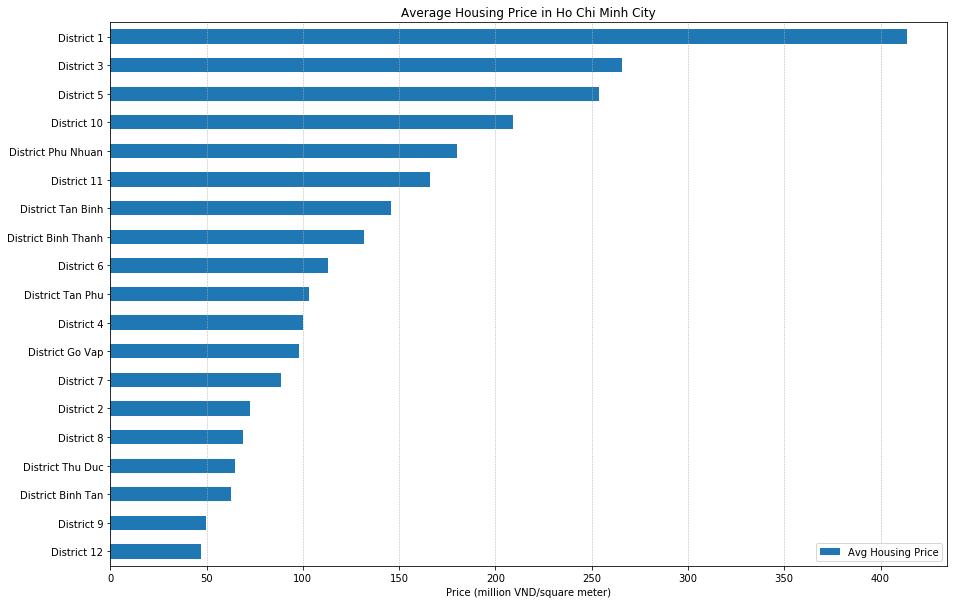

In [8]:
import matplotlib.pyplot as plt
data_sort.plot(x='District',y='Avg Housing Price', kind='barh', figsize=(15,10))
plt.title('Average Housing Price in Ho Chi Minh City')
plt.grid(axis='x',linestyle='--', linewidth=0.5)
plt.xlabel('Price (million VND/square meter)')
plt.ylabel('')
plt.show()

# Get latitude and longitude of each District by Geocoder

In [9]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Ho Chi Minh City, Vietnam'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [10]:
coords = [ get_latlng(neighborhood) for neighborhood in data['District'].tolist() ]
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
data['Latitude'] = df_coords['Latitude']
data['Longitude'] = df_coords['Longitude']
data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,District,Avg Housing Price,Latitude,Longitude
0,District 1,414.0,10.78095,106.69911
1,District 2,72.6,10.79199,106.74985
2,District 3,266.0,10.77567,106.68670
3,District 4,100.0,10.76670,106.70650
4,District 5,254.0,10.75569,106.66637
5,District 6,113.0,10.74597,106.64769
6,District 7,88.4,10.70515,106.73748
7,District 8,68.8,10.74771,106.66334
8,District 9,49.7,10.82004,106.83185
9,District 10,209.0,10.76867,106.66564


In [11]:
data['Latitude'][6]=10.730607
data['Longitude'][6]=106.720952
data['Latitude'][8]=10.831797
data['Longitude'][8]=106.783006
data['Latitude'][12]=10.751273
data['Longitude'][12]=106.609766
data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

,District,Avg Housing Price,Latitude,Longitude
0,District 1,414.0,10.780950,106.699110
1,District 2,72.6,10.791990,106.749850
2,District 3,266.0,10.775670,106.686700
3,District 4,100.0,10.766700,106.706500
4,District 5,254.0,10.755690,106.666370
5,District 6,113.0,10.745970,106.647690
6,District 7,88.4,10.730607,106.720952
7,District 8,68.8,10.747710,106.663340
8,District 9,49.7,10.831797,106.783006
9,District 10,209.0,10.768670,106.665640


# Create Map of Districts in HCMC

In [12]:
address = 'Ho Chi Minh City, VN'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

10.7758439 106.7017555


In [13]:
map_hcm = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(data['Latitude'], data['Longitude'], data['District']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_hcm)  
    
map_hcm

# Calculate Average Price for Lease

In [14]:
Address=[]
Area=[]
Price=[]
for d in data['District']:
    di=d.lower().replace(' ','-').replace('district','quan')
    for i in range(1,5):    
        url2 = 'https://mogi.vn/ho-chi-minh/{}/thue-mat-bang-cua-hang-shop?cp={}'.format(di,i)
        response2 = requests.get(url2)
        soup2 = BeautifulSoup(response2.content, "html.parser")
        source2=soup2.findAll('div', class_='prop-info')
        for addr in source2: Address.append(addr.find('div', class_='prop-addr').text)
        for ar in source2: Area.append(ar.find('li',class_='land').text)
        for pr in source2: Price.append(pr.find('div',class_='price').text)  

In [15]:
data2=pd.DataFrame({'Address':Address,'Area':Area, 'Price':Price})
data2.tail()

,Address,Area,Price
1104,"Đường số 2, Quận Thủ Đức, TP.HCM",200 m2,16 triệu
1105,"Hồ Văn Tư, Phường Trường Thọ, Quận Thủ Đức, TP...",4 m2,3 triệu
1106,"Hoàng Diệu 2, Quận Thủ Đức, TP.HCM",16 m2,2 triệu
1107,"Linh Trung, Quận Thủ Đức, TP.HCM",300 m2,20 triệu
1108,"Đường số 2, Phường Trường Thọ, Quận Thủ Đức, T...",300 m2,5 triệu


In [16]:
data2['District']=[unidecode(addr[(addr.find('Quận')):(len(addr)-7)]) for addr in data2['Address']]
data2.tail()

,Address,Area,Price,District
1104,"Đường số 2, Quận Thủ Đức, TP.HCM",200 m2,16 triệu,"Quan Thu Duc,"
1105,"Hồ Văn Tư, Phường Trường Thọ, Quận Thủ Đức, TP...",4 m2,3 triệu,"Quan Thu Duc,"
1106,"Hoàng Diệu 2, Quận Thủ Đức, TP.HCM",16 m2,2 triệu,"Quan Thu Duc,"
1107,"Linh Trung, Quận Thủ Đức, TP.HCM",300 m2,20 triệu,"Quan Thu Duc,"
1108,"Đường số 2, Phường Trường Thọ, Quận Thủ Đức, T...",300 m2,5 triệu,"Quan Thu Duc,"


In [19]:
data2['District']=data2['District'].str.replace(',','')
data2.groupby(['District']).count()

,Address,Area,Price
District,,,
Quan 1,60,60,60
Quan 10,60,60,60
Quan 11,60,60,60
Quan 12,52,52,52
Quan 12 Ho Chi Minh ( gan xi nghiep may Viet Hung ) Quoc Lo 22 Phuong Trung My Tay Quan 12,2,2,2
Quan 2,60,60,60
Quan 3,60,60,60
Quan 4,60,60,60
Quan 5,60,60,60


In [20]:
data2[data2['Price'].str.contains(' đ')]

,Address,Area,Price,District
224,"364 Bến Vân Đồn, Phường 1, Quận 4, TP.HCM",75 m2,998.000 đ,Quan 4
420,"Võ Văn Kiệt, Phường 16, Quận 8, TPHCM",400 m2,299.000 đ,Quan 8
421,"Lý Đạo Thành, Phường 16, Quận 8, TPHCM",100 m2,100.000 đ,Quan 8
422,"Võ Văn Kiệt, Phường 16, Quận 8, TPHCM",400 m2,300.000 đ,Quan 8
423,"An Dương Vương, Phường 16, Quận 8, TPHCM",400 m2,300.000 đ,Quan 8
424,"Lý Đạo Thành, Phường 16, Quận 8, TPHCM",65 m2,300.000 đ,Quan 8
425,"Lý Đạo Thành, Phường 16, Quận 8, TPHCM",400 m2,250.000 đ,Quan 8
459,"6 Đường số 1011, Phường 5, Quận 8, TP.HCM",1 m2,150.000 đ,Quan 8
1070,"Quốc Lộ 13, Phường Hiệp Bình Phước, Quận Thủ Đ...",1 m2,500.000 đ,Quan Thu Duc


I drop the above data due to too low price. They wanted to attract customer.

In [21]:
data2.drop([224,421,422,423,424,425,426,459,1070],inplace=True)

In [22]:
data2['Area']=data2['Area'].str.replace('m2','')
data2['Price']=data2['Price'].str.replace(' triệu ','.')
data2['Price']=data2['Price'].str.replace(' nghìn','')
data2['Price']=data2['Price'].str.replace(' triệu','.0')
data2['Price']=data2['Price'].str.replace(' đ','')
data2['Price']=data2['Price'].str.replace(' tỷ ','')
data2['Price']=data2['Price'].str.replace(' tỷ','000')
data2['District']=data2['District'].str.replace(',','')
data2['Area']=data2['Area'].astype('float')
data2['Price']=data2['Price'].astype('float')
data2.tail()

,Address,Area,Price,District
1104,"Đường số 2, Quận Thủ Đức, TP.HCM",200.0,16.0,Quan Thu Duc
1105,"Hồ Văn Tư, Phường Trường Thọ, Quận Thủ Đức, TP...",4.0,3.0,Quan Thu Duc
1106,"Hoàng Diệu 2, Quận Thủ Đức, TP.HCM",16.0,2.0,Quan Thu Duc
1107,"Linh Trung, Quận Thủ Đức, TP.HCM",300.0,20.0,Quan Thu Duc
1108,"Đường số 2, Phường Trường Thọ, Quận Thủ Đức, T...",300.0,5.0,Quan Thu Duc


In [23]:
data2[data2['District']=='Quan 12 Ho Chi Minh ( gan xi nghiep may Viet Hung ) Quoc Lo 22 Phuong Trung My Tay Quan 12']

,Address,Area,Price,District
666,"8A, QL22, khu phố 4 , phường Trung Mỹ Tây, Quậ...",36.0,16.5,Quan 12 Ho Chi Minh ( gan xi nghiep may Viet H...
667,"8A, QL22, khu phố 4,phường Trung Mỹ Tây, Quận ...",65.0,9.0,Quan 12 Ho Chi Minh ( gan xi nghiep may Viet H...


The 2 rows have wrong extraction of district so I correct them

In [24]:
data2['District'][666]='Quan 12'
data2['District'][667]='Quan 12'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
data2['District']=data2['District'].str.replace('Quan','District')

I drop the rows that cannot extract the district and the rows with the area below 5 square meters because it is too small.

In [26]:
data2=data2[data2['Area']>=5].reset_index(drop=True)
data2=data2[data2['District']!=''].reset_index(drop=True)
data2.shape

(1098, 4)

In [27]:
data2['Avg Price for Lease']=data2['Price']/data2['Area']
data2.head(10)

,Address,Area,Price,District,Avg Price for Lease
0,"Tôn Thất Đạm, Phường Nguyễn Thái Bình, Quận 1,...",1000.0,250.0,District 1,0.250000
1,"Lê Thị Riêng, Phường Bến Thành, Quận 1, TPHCM",480.0,150.0,District 1,0.312500
2,"Cô Bắc, Phường Cô Giang, Quận 1, TPHCM",800.0,310.0,District 1,0.387500
3,"Pasteur, Phường Bến Nghé, Quận 1, TPHCM",144.0,148.0,District 1,1.027778
4,"Hồ Tùng Mậu, Phường Bến Nghé, Quận 1, TPHCM",50.0,130.0,District 1,2.600000
5,"Cách Mạng Tháng 8, Phường Bến Thành, Quận 1, T...",300.0,80.0,District 1,0.266667
6,"Đề Thám, Phường Cầu Ông Lãnh, Quận 1, TPHCM",116.0,70.0,District 1,0.603448
7,"Thủ Khoa Huân, Phường Bến Thành, Quận 1, TPHCM",200.0,130.0,District 1,0.650000
8,"Nguyễn Trãi, Phường Bến Thành, Quận 1, TPHCM",420.0,79.0,District 1,0.188095
9,"Bùi Viện, Phường Phạm Ngũ Lão, Quận 1, TPHCM",126.0,45.0,District 1,0.357143


In [63]:
data3=data2[['District','Area','Price','Avg Price for Lease']]
data3.tail()

,District,Area,Price,Avg Price for Lease
1093,District Thu Duc,30.0,7.0,0.233333
1094,District Thu Duc,200.0,16.0,0.080000
1095,District Thu Duc,16.0,2.0,0.125000
1096,District Thu Duc,300.0,20.0,0.066667
1097,District Thu Duc,300.0,5.0,0.016667


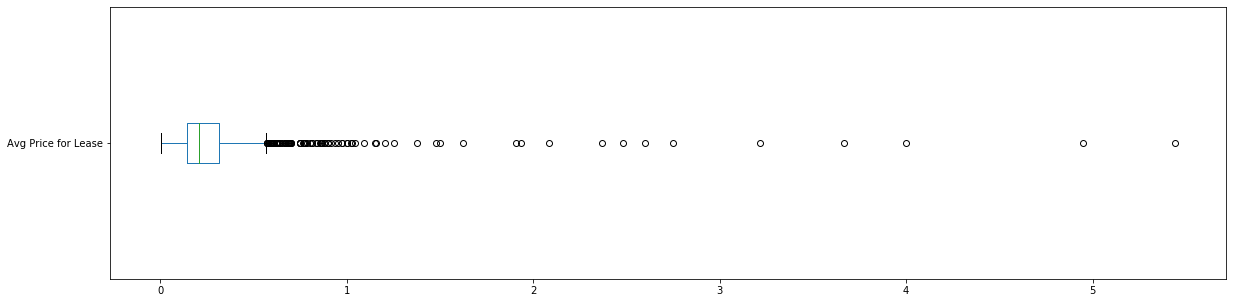

In [30]:
data3['Avg Price for Lease'].plot(kind='box',vert=False, figsize=(20,5))
plt.show()

I will drop some outliers so that they cannot affect the average price for lease of each District

In [64]:
data3=data3[data3['Avg Price for Lease']<3].reset_index(drop=True)
data3.shape

(1093, 4)

In [65]:
data4=data3.groupby('District',as_index=False).mean().sort_values(by='Avg Price for Lease', ascending=True)
data4

,District,Area,Price,Avg Price for Lease
12,District Binh Tan,465.100000,50.591667,0.178719
16,District Tan Binh,506.766667,84.766667,0.211840
1,District 10,412.083333,84.400000,0.223050
13,District Binh Thanh,395.200000,80.536667,0.225084
17,District Tan Phu,283.033333,52.600000,0.227169
3,District 12,217.905660,47.933962,0.227379
15,District Phu Nhuan,648.016667,100.316667,0.234923
11,District 9,287.769231,46.605769,0.238519
8,District 6,292.500000,48.666667,0.238760
14,District Go Vap,559.616667,110.870000,0.244059


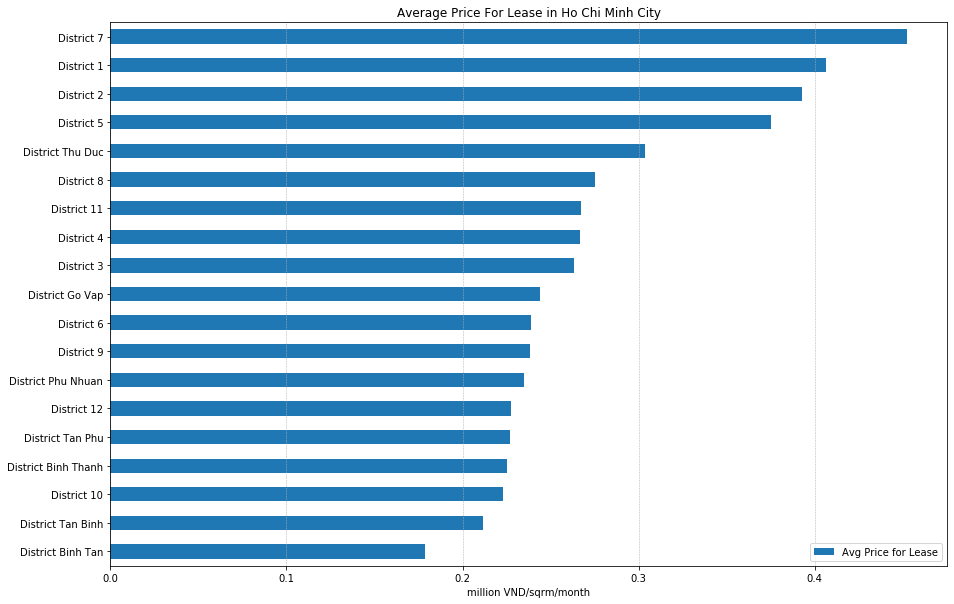

In [66]:
data4.plot(kind='barh',x='District',y='Avg Price for Lease', figsize=(15,10))
plt.title('Average Price For Lease in Ho Chi Minh City')
plt.ylabel('')
plt.xlabel('million VND/sqrm/month')
plt.grid(axis='x',linestyle='--', linewidth=0.5)
plt.show()

In [67]:
datafinal=pd.merge(data,data4[['District','Avg Price for Lease']], how='left',on='District')
datafinal=datafinal[['District','Avg Housing Price','Avg Price for Lease', 'Latitude','Longitude']]
datafinal

,District,Avg Housing Price,Avg Price for Lease,Latitude,Longitude
0,District 1,414.0,0.406495,10.780950,106.699110
1,District 2,72.6,0.392694,10.791990,106.749850
2,District 3,266.0,0.263403,10.775670,106.686700
3,District 4,100.0,0.266698,10.766700,106.706500
4,District 5,254.0,0.375345,10.755690,106.666370
5,District 6,113.0,0.238760,10.745970,106.647690
6,District 7,88.4,0.452621,10.730607,106.720952
7,District 8,68.8,0.275344,10.747710,106.663340
8,District 9,49.7,0.238519,10.831797,106.783006
9,District 10,209.0,0.223050,10.768670,106.665640


In [68]:
Address2=[]
Area2=[]
Price2=[]
for i in range(1,81):    
        url3 = 'https://mogi.vn/ho-chi-minh/thue-mat-bang-cua-hang-shop?cp={}'.format(i)
        response3 = requests.get(url3)
        soup3 = BeautifulSoup(response3.content, "html.parser")
        source3=soup3.findAll('div', class_='prop-info')
        for addr in source3: Address2.append(addr.find('div', class_='prop-addr').text)
        for ar in source3: Area2.append(ar.find('li',class_='land').text)
        for pr in source3: Price2.append(pr.find('div',class_='price').text)  

In [69]:
data5=pd.DataFrame({'Address':Address2,'Area':Area2, 'Price':Price2})
data5.tail()

,Address,Area,Price
1195,"Sông Đà, Phường 2, Quận Tân Bình, TPHCM",200 m2,41 triệu 400 nghìn
1196,"Trần Quốc Toản, Phường 8, Quận 3, TPHCM",154 m2,60 triệu
1197,"Sư Vạn Hạnh, Phường 12, Quận 10, TPHCM",440 m2,60 triệu
1198,"Bắc Hải, Phường 14, Quận 10, TPHCM",364 m2,62 triệu
1199,"Đề Thám, Phường Phạm Ngũ Lão, Quận 1, TPHCM",0 m2,23 triệu


In [70]:
data5['District']=[unidecode(addr[(addr.find('Quận')):(len(addr)-7)]) for addr in data5['Address']]
data5.tail()

,Address,Area,Price,District
1195,"Sông Đà, Phường 2, Quận Tân Bình, TPHCM",200 m2,41 triệu 400 nghìn,Quan Tan Binh
1196,"Trần Quốc Toản, Phường 8, Quận 3, TPHCM",154 m2,60 triệu,Quan 3
1197,"Sư Vạn Hạnh, Phường 12, Quận 10, TPHCM",440 m2,60 triệu,Quan 10
1198,"Bắc Hải, Phường 14, Quận 10, TPHCM",364 m2,62 triệu,Quan 10
1199,"Đề Thám, Phường Phạm Ngũ Lão, Quận 1, TPHCM",0 m2,23 triệu,Quan 1


In [71]:
data5[data5['Price'].str.contains(' đ')]

,Address,Area,Price,District
816,"Quốc Hương, Phường Thảo Điền, Quận 2, TPHCM",500 m2,326.000 đ,Quan 2
823,"Đặng Thi Mai, Phường Thảo Điền, Quận 2, TPHCM",2500 m2,400.000 đ,Quan 2


In [72]:
data5.drop([816,823],inplace=True)

In [73]:
data5['Area']=data5['Area'].str.replace('m2','')
data5['Price']=data5['Price'].str.replace(' triệu ','.')
data5['Price']=data5['Price'].str.replace(' nghìn','')
data5['Price']=data5['Price'].str.replace(' triệu','.0')
data5['Price']=data5['Price'].str.replace(' đ','')
data5['Price']=data5['Price'].str.replace(' tỷ ','')
data5['Price']=data5['Price'].str.replace(' tỷ','000')
data5['District']=data5['District'].str.replace(',','')
data5['Area']=data5['Area'].astype('float')
data5['Price']=data5['Price'].astype('float')
data5.tail()

,Address,Area,Price,District
1195,"Sông Đà, Phường 2, Quận Tân Bình, TPHCM",200.0,41.4,Quan Tan Binh
1196,"Trần Quốc Toản, Phường 8, Quận 3, TPHCM",154.0,60.0,Quan 3
1197,"Sư Vạn Hạnh, Phường 12, Quận 10, TPHCM",440.0,60.0,Quan 10
1198,"Bắc Hải, Phường 14, Quận 10, TPHCM",364.0,62.0,Quan 10
1199,"Đề Thám, Phường Phạm Ngũ Lão, Quận 1, TPHCM",0.0,23.0,Quan 1


In [74]:
data5['District']=data5['District'].str.replace('Quan','District')

In [75]:
data5=data5[data5['Area']>=5].reset_index(drop=True)
data5=data5[data5['District']!=''].reset_index(drop=True)
data5.shape

(1193, 4)

In [76]:
data6=data5[['District','Area','Price']]
data6.tail()

,District,Area,Price
1188,District 10,304.0,52.0
1189,District Tan Binh,200.0,41.4
1190,District 3,154.0,60.0
1191,District 10,440.0,60.0
1192,District 10,364.0,62.0


In [77]:
data6['Avg Price for Lease']=data6['Price']/data6['Area']
data6.tail()

,District,Area,Price,Avg Price for Lease
1188,District 10,304.0,52.0,0.171053
1189,District Tan Binh,200.0,41.4,0.207000
1190,District 3,154.0,60.0,0.389610
1191,District 10,440.0,60.0,0.136364
1192,District 10,364.0,62.0,0.170330


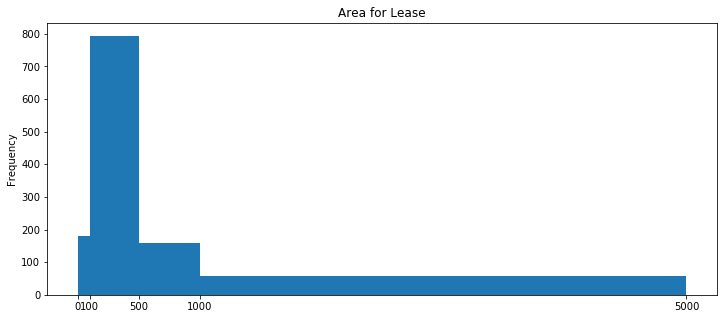

In [78]:
bin_edges=[0,100,500,1000,5000]
data6['Area'].plot(figsize=(12,5),kind='hist',bins=bin_edges, xticks=bin_edges)
plt.title('Area for Lease')
plt.show()

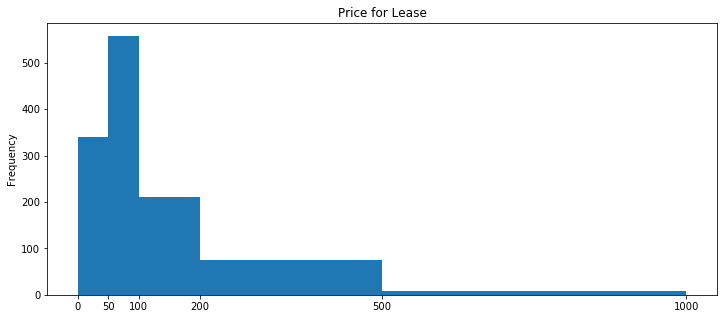

In [79]:
bin_edges=[0,50,100,200,500,1000]
data6['Price'].plot(figsize=(12,5),kind='hist',bins=bin_edges, xticks=bin_edges)
plt.title('Price for Lease')
plt.show()

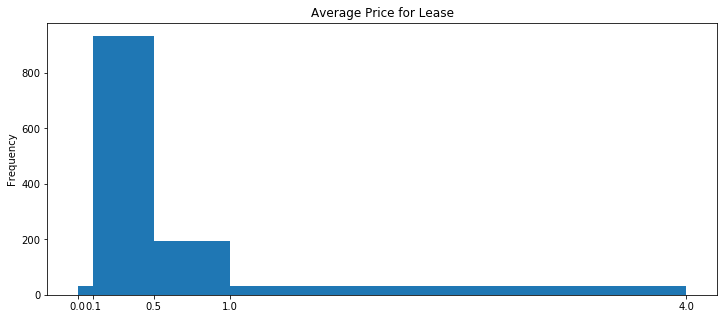

In [80]:
bin_edges=[0,0.1,0.5,1,4]
data6['Avg Price for Lease'].plot(figsize=(12,5),kind='hist',bins=bin_edges, xticks=bin_edges)
plt.title('Average Price for Lease')
plt.show()

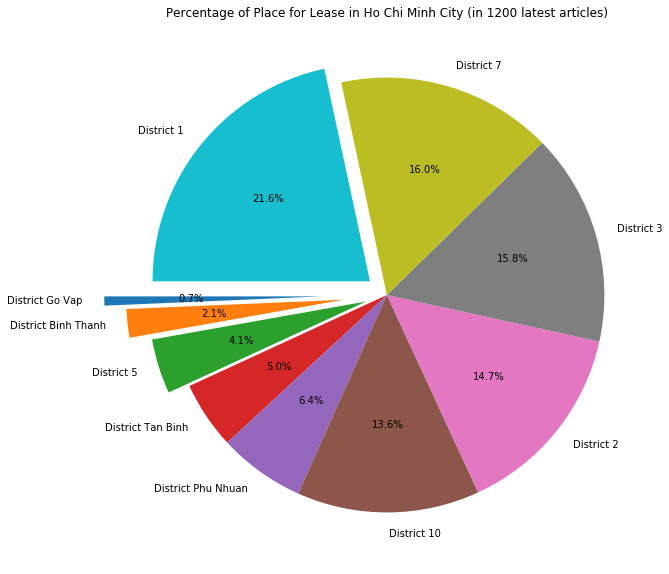

In [81]:
data7=data6.groupby(['District'],as_index=False).count()
data7=data7[['District','Area']]
data7.rename(columns={'Area':'Count'},inplace=True)
data7=data7.sort_values(by=['Count'],ascending=True).tail(10)
explode = (0.3, 0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1)
data7.plot(x='District',labels=data7['District'], y='Count',kind='pie', figsize=(15,10),autopct='%1.1f%%',startangle=180, explode=explode,legend=None)
plt.title('Percentage of Place for Lease in Ho Chi Minh City (in 1200 latest articles)')
plt.ylabel('')
plt.show()

# Explore common venues in each District

In [82]:
# @hide this code
CLIENT_ID = 'YCGVT0IAX35HYR0RW4FJDCNRBVJ5EHDYXBBTMW2C0STCNRZQ' # your Foursquare ID
CLIENT_SECRET = '02XEAPTUVT50GCHNFLPHAGQF3VPEV12AVO5134VU2YLPWC4H' # your Foursquare Secret
VERSION = '20200428'
LIMIT = 50

In [83]:
radius = 1500
LIMIT = 100

venues = []

for lat, long, dist in zip(data['Latitude'], data['Longitude'], data['District']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            dist,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [84]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['District', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1069, 7)


,District,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,District 1,10.78095,106.69911,Pacey Cupcakes,10.780202,106.700773,Cupcake Shop
1,District 1,10.78095,106.69911,Pizza 4P’s Hai Bà Trưng,10.783017,106.697017,Pizza Place
2,District 1,10.78095,106.69911,MGallery Hotel des Art,10.782382,106.697103,Hotel
3,District 1,10.78095,106.69911,Club Lounge @ InterContinental Saigon,10.780975,106.700968,Hotel Bar
4,District 1,10.78095,106.69911,Social Club @ Hotel Des Arts,10.782372,106.697303,Hotel Bar


In [85]:
venues_df.groupby(["District"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
District,,,,,,
District 1,100,100,100,100,100,100
District 10,100,100,100,100,100,100
District 11,36,36,36,36,36,36
District 12,10,10,10,10,10,10
District 2,28,28,28,28,28,28
District 3,100,100,100,100,100,100
District 4,100,100,100,100,100,100
District 5,59,59,59,59,59,59
District 6,25,25,25,25,25,25


In [86]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 134 uniques categories.


In [87]:
# one hot encoding
hcmc_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hcmc_onehot['District'] = venues_df['District'] 

# move neighborhood column to the first column
fixed_columns = [hcmc_onehot.columns[-1]] + list(hcmc_onehot.columns[:-1])
hcmc_onehot = hcmc_onehot[fixed_columns]

hcmc_onehot.head()

,District,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bathing Area,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Café,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Motel,Movie Theater,Multiplex,Museum,Nightclub,Noodle House,North Indian Restaurant,Opera House,Outdoors & Recreation,Park,Pet Café,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soup Place,Spa,Spanish Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Track Stadium,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Yoga Studio
0,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


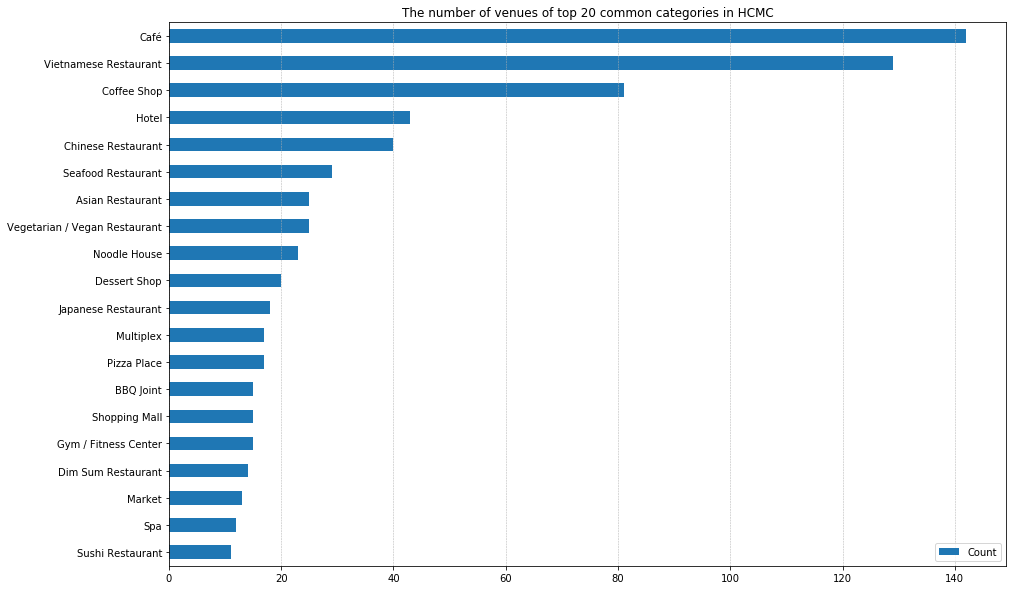

In [88]:
hcmc_categories=venues_df.groupby(['VenueCategory'],as_index=False).count()
hcmc_categories=hcmc_categories[['VenueCategory','District']]
hcmc_categories.rename(columns={'District':'Count'},inplace=True)
hcmc_categories=hcmc_categories.sort_values(by=['Count'],ascending=True).tail(20)
hcmc_categories.plot(x='VenueCategory', y='Count',kind='barh', figsize=(15,10))
plt.title('The number of venues of top 20 common categories in HCMC')
plt.ylabel('')
plt.grid(axis='x',linestyle='--', linewidth=0.5)
plt.show()

In [89]:
hcmc_grouped = hcmc_onehot.groupby('District').mean().reset_index()
hcmc_grouped

,District,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bathing Area,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Café,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Motel,Movie Theater,Multiplex,Museum,Nightclub,Noodle House,North Indian Restaurant,Opera House,Outdoors & Recreation,Park,Pet Café,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soup Place,Spa,Spanish Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Track Stadium,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Yoga Studio
0,District 1,0.000000,0.000000,0.01,0.00,0.030000,0.00,0.010000,0.00,0.000000,0.01,0.000000,0.00,0.00,0.00,0.000000,0.01,0.010000,0.000000,0.000000,0.010000,0.00,0.010000,0.000000,0.090000,0.000000,0.000000,0.010000,0.02,0.070000,0.010000,0.010000,0.000000,0.010000,0.00,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.030000,0.000000,0.00,0.000000,0.00,0.01,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.080000,0.04,0.02,0.000000,0.000000,0.020000,0.020000,0.01,0.01,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.050000,0.00,0.000000,0.010000,0.000000,0.00,0.00,0.000000,0.020000,0.00,0.00,0.000000,0.01,0.01,0.00,0.000000,0.000000,0.030000,0.000000,0.000000,0.00,0.02,0.000000,0.00,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.020000,0.01,0.000000,0.010000,0.010000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.030000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.00,0.080000,0.000000,0.000000,0.01,0.000000
1,District 10,0.000000,0.000000,0.00,0.01,0.030000,0.00,0.020000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.180000,0.000000,0.050000,0.000000,0.00,0.090000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.030000,0.010000,0.000000,0.000000,0.00,0.010000,0.010000,0.000000,0.01,0.000000,0.00,0.010000,0.010000,0.000000,0.01,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.020000,0.000000,0.010000,0.00,0.01,0.020000,0.010000,0.000000,0.010000,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.01,0.00,0.000000,0.020000,0.00,0.00,0.010000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.00,0.010000,0.00,0.050000,0.000000,0.010000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.000000,0.010000,0.010000,0.010000,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.00,0.170000,0.000000,0.000000,0.00,0.000000
2,District 11,0.027778,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0

In [90]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [91]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = hcmc_grouped['District']

for ind in np.arange(hcmc_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hcmc_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,District 1,Café,Hotel,Vietnamese Restaurant,Coffee Shop,Massage Studio,Hotel Bar,Vegetarian / Vegan Restaurant,Thai Restaurant,French Restaurant,Asian Restaurant
1,District 10,Café,Vietnamese Restaurant,Coffee Shop,Chinese Restaurant,Seafood Restaurant,Dessert Shop,Vegetarian / Vegan Restaurant,Asian Restaurant,Ice Cream Shop,Multiplex
2,District 11,Café,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant,Cantonese Restaurant,American Restaurant,Basketball Stadium,Mobile Phone Shop,Electronics Store,Dumpling Restaurant
3,District 12,Café,Park,Noodle House,Coffee Shop,Gym,Shopping Mall,Electronics Store,Flower Shop,Flea Market,Fast Food Restaurant
4,District 2,Café,Shopping Mall,Vietnamese Restaurant,Coffee Shop,Department Store,Buffet,Burger Joint,Market,Sushi Restaurant,Fast Food Restaurant


In [92]:
hcmc_grouped_clustering=hcmc_grouped.drop('District',1)
hcmc_grouped_clustering

,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bathing Area,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Café,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Motel,Movie Theater,Multiplex,Museum,Nightclub,Noodle House,North Indian Restaurant,Opera House,Outdoors & Recreation,Park,Pet Café,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soup Place,Spa,Spanish Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Track Stadium,Trail,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Yoga Studio
0,0.000000,0.000000,0.01,0.00,0.030000,0.00,0.010000,0.00,0.000000,0.01,0.000000,0.00,0.00,0.00,0.000000,0.01,0.010000,0.000000,0.000000,0.010000,0.00,0.010000,0.000000,0.090000,0.000000,0.000000,0.010000,0.02,0.070000,0.010000,0.010000,0.000000,0.010000,0.00,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.030000,0.000000,0.00,0.000000,0.00,0.01,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.080000,0.04,0.02,0.000000,0.000000,0.020000,0.020000,0.01,0.01,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.050000,0.00,0.000000,0.010000,0.000000,0.00,0.00,0.000000,0.020000,0.00,0.00,0.000000,0.01,0.01,0.00,0.000000,0.000000,0.030000,0.000000,0.000000,0.00,0.02,0.000000,0.00,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.020000,0.01,0.000000,0.010000,0.010000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.030000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.00,0.080000,0.000000,0.000000,0.01,0.000000
1,0.000000,0.000000,0.00,0.01,0.030000,0.00,0.020000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.180000,0.000000,0.050000,0.000000,0.00,0.090000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.030000,0.010000,0.000000,0.000000,0.00,0.010000,0.010000,0.000000,0.01,0.000000,0.00,0.010000,0.010000,0.000000,0.01,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.020000,0.000000,0.010000,0.00,0.01,0.020000,0.010000,0.000000,0.010000,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.01,0.00,0.000000,0.020000,0.00,0.00,0.010000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.00,0.010000,0.00,0.050000,0.000000,0.010000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.000000,0.010000,0.010000,0.010000,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.00,0.170000,0.000000,0.000000,0.00,0.000000
2,0.027778,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.027778,0.00,0.00,0.00,0.000000,0.00,0.00

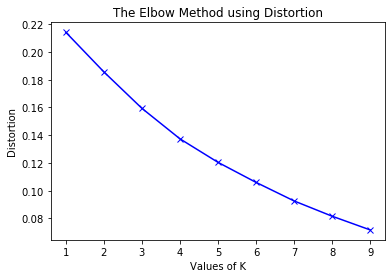

In [93]:
from sklearn import metrics 
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
X=hcmc_grouped_clustering
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [94]:
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hcmc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1, 1, 0, 0, 3, 3, 0], dtype=int32)

In [95]:
# add clustering labels
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hcmc_merged = datafinal

# merge hcmc_grouped with hcmc_data to add latitude/longitude for each district
hcmc_merged = hcmc_merged.join(districts_venues_sorted.set_index('District'), on='District')

hcmc_merged.head() # check the last columns!

,District,Avg Housing Price,Avg Price for Lease,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,District 1,414.0,0.406495,10.78095,106.69911,0,Café,Hotel,Vietnamese Restaurant,Coffee Shop,Massage Studio,Hotel Bar,Vegetarian / Vegan Restaurant,Thai Restaurant,French Restaurant,Asian Restaurant
1,District 2,72.6,0.392694,10.79199,106.74985,1,Café,Shopping Mall,Vietnamese Restaurant,Coffee Shop,Department Store,Buffet,Burger Joint,Market,Sushi Restaurant,Fast Food Restaurant
2,District 3,266.0,0.263403,10.77567,106.68670,0,Hotel,Vietnamese Restaurant,Café,Coffee Shop,Hostel,Pizza Place,Bookstore,Sushi Restaurant,Dessert Shop,Vegetarian / Vegan Restaurant
3,District 4,100.0,0.266698,10.76670,106.70650,0,Hotel,Vietnamese Restaurant,Café,Coffee Shop,Massage Studio,Japanese Restaurant,Thai Restaurant,Whisky Bar,Burger Joint,French Restaurant
4,District 5,254.0,0.375345,10.75569,106.66637,3,Chinese Restaurant,Vietnamese Restaurant,Coffee Shop,Noodle House,Dim Sum Restaurant,Vegetarian / Vegan Restaurant,Café,Dessert Shop,BBQ Joint,Market


In [96]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i +x + (i*x)**4 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#create choropleth map
hcmc_map=r'hcm_urban_districts.geojson'
map_clusters.choropleth(geo_data=hcmc_map, data=data, columns=['District','Avg Housing Price'],
                        key_on='feature.properties.name',fill_color='PuRd', legend_name='Average Housing Price (million VND/Sqrm)' )

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hcmc_merged['Latitude'], hcmc_merged['Longitude'], hcmc_merged['District'], hcmc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters) 

map_clusters

In [97]:
hcmc_merged.loc[hcmc_merged['Cluster Labels'] == 0, hcmc_merged.columns[[0,1,2] + list(range(6, hcmc_merged.shape[1]-5))]]

,District,Avg Housing Price,Avg Price for Lease,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,District 1,414.0,0.406495,Café,Hotel,Vietnamese Restaurant,Coffee Shop,Massage Studio
2,District 3,266.0,0.263403,Hotel,Vietnamese Restaurant,Café,Coffee Shop,Hostel
3,District 4,100.0,0.266698,Hotel,Vietnamese Restaurant,Café,Coffee Shop,Massage Studio
6,District 7,88.4,0.452621,Vietnamese Restaurant,Café,Coffee Shop,Fried Chicken Joint,Japanese Restaurant
9,District 10,209.0,0.223050,Café,Vietnamese Restaurant,Coffee Shop,Chinese Restaurant,Seafood Restaurant
10,District 11,166.0,0.267159,Café,Vietnamese Restaurant,Chinese Restaurant,Seafood Restaurant,Cantonese Restaurant
13,District Binh Thanh,132.0,0.225084,Café,Vietnamese Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Asian Restaurant
15,District Phu Nhuan,180.0,0.234923,Vietnamese Restaurant,Café,Coffee Shop,Hotel,Asian Restaurant
16,District Tan Binh,146.0,0.211840,Vietnamese Restaurant,Café,Coffee Shop,Hotel,Seafood Restaurant
17,District Tan Phu,103.0,0.227169,Vietnamese Restaurant,Café,Supermarket,Fast Food Restaurant,Movie Theater


In [98]:
hcmc_merged.loc[hcmc_merged['Cluster Labels'] == 1, hcmc_merged.columns[[0,1,2] + list(range(6, hcmc_merged.shape[1]-5))]]

,District,Avg Housing Price,Avg Price for Lease,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,District 2,72.6,0.392694,Café,Shopping Mall,Vietnamese Restaurant,Coffee Shop,Department Store
11,District 12,46.9,0.227379,Café,Park,Noodle House,Coffee Shop,Gym
12,District Binh Tan,62.8,0.178719,Café,Shopping Mall,Coffee Shop,Fast Food Restaurant,Multiplex
14,District Go Vap,98.0,0.244059,Café,Pizza Place,Shopping Mall,Lounge,Coffee Shop
18,District Thu Duc,64.7,0.303811,Café,Shopping Mall,Vietnamese Restaurant,Coffee Shop,Multiplex


In [99]:
hcmc_merged.loc[hcmc_merged['Cluster Labels'] == 2, hcmc_merged.columns[[0,1,2] + list(range(6, hcmc_merged.shape[1]-5))]]

,District,Avg Housing Price,Avg Price for Lease,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,District 9,49.7,0.238519,Lake,Restaurant,Shopping Mall,Market,Eastern European Restaurant


In [100]:
hcmc_merged.loc[hcmc_merged['Cluster Labels'] == 3, hcmc_merged.columns[[0,1,2] + list(range(6, hcmc_merged.shape[1]-5))]]

,District,Avg Housing Price,Avg Price for Lease,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,District 5,254.0,0.375345,Chinese Restaurant,Vietnamese Restaurant,Coffee Shop,Noodle House,Dim Sum Restaurant
5,District 6,113.0,0.238760,Chinese Restaurant,Dessert Shop,Cantonese Restaurant,Market,Dim Sum Restaurant
7,District 8,68.8,0.275344,Chinese Restaurant,Dim Sum Restaurant,Café,Vietnamese Restaurant,Coffee Shop
